# Exercício

Procure uma base de dados em um dos seguintes sites: 
https://www.kaggle.com/datasets ou
https://archive.ics.uci.edu/ml/index.php

A base escolhida deve ter pelo menos 5000 linhas e 10 colunas. Em seguida, utilizando sua criatividade e os conceitos que você aprendeu nos dois jupyter notebooks anteriores do pandas, tente realizar operações interessantes na base de dados escolhida.  


# Aluno: Clésio de Araújo Gonçalves

In [1]:
# Imports
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carrega o dataset e exibe algumas informações

In [2]:
# Lendo a base de dados no formato .csv.
# Base de dados: Visão Geral das Taxas de Suicídio de 1985 a 2016
# Compara informações socioeconômicas com taxas de suicídio por ano e país
# URL: (https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)
arquivo = 'master.csv'
dataset = pandas.read_csv(arquivo)
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Tipo do objeto
type(dataset)

pandas.core.frame.DataFrame

In [4]:
# Atributos e métodos disponíveis para o objeto dataset
dir(dataset)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [5]:
# Quantidade de linhas e colunas (27.820 x 12)
dataset.shape

(27820, 12)

In [6]:
# Informações do sobre as colunas do dataset
# A coluna 'IDH para o ano' possui apenas 8.364 registros
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
# Exibe as colunas
# Colunas: [país, ano, sexo, faixa etária, nº de suicídios, população, taxa de suicídio (100k hab), 
# chave composta país-ano, IDH para o ano, PIB para o ano ($), PIB per capita ($), geração 
# (com base na média de grupos de idade).]
dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
# Renomeando Colunas
# inplace=True modifica o objeto em memória
dataset.rename(
    columns = {
        'country':'Pais', 
        'year':'Ano', 
        'sex':'Sexo', 
        'age':'Idade', 
        'suicides_no':'NoSuicidio', 
        'population':'Populacao',
        'suicides/100k pop':'Suicidio100kPop',
        'country-year':'PaisAno',
        'HDI for year':'IDHPorAno',
        ' gdp_for_year ($) ':'PIBPorAnoValor', 
        'gdp_per_capita ($)':'PIBPerCapitaValor',
        'generation':'Geracao'
        }, 
    inplace=True
)

In [9]:
# Soma de valores nulos
dataset.isnull().sum()

Pais                     0
Ano                      0
Sexo                     0
Idade                    0
NoSuicidio               0
Populacao                0
Suicidio100kPop          0
PaisAno                  0
IDHPorAno            19456
PIBPorAnoValor           0
PIBPerCapitaValor        0
Geracao                  0
dtype: int64

In [10]:
# Excluir a coluna IDHPorAno por apresentar valores nulos e excluir o PaisAno pois apresenta duplicação
dataset.drop(['IDHPorAno', 'PaisAno'], axis=1, inplace=True)

In [11]:
# Retirar a vírgula do valor numérico de PIBPorAnoValor
dataset['PIBPorAnoValor'] = dataset['PIBPorAnoValor'].apply(lambda x: x.replace(',', ''))

In [12]:
# Convertendo tipos de dados para melhorar uso de memória
dataset.Pais = dataset.Pais.astype('category')
dataset.Ano = dataset.Ano.astype('int32')
dataset.Sexo = dataset.Sexo.astype('category')
dataset.Idade = dataset.Idade.astype('category')
dataset.NoSuicidio = dataset.NoSuicidio.astype('int32')
dataset.Populacao = dataset.Populacao.astype('int32')
dataset.Suicidio100kPop = dataset.Suicidio100kPop.astype('float32')
dataset.PIBPorAnoValor = dataset.PIBPorAnoValor.astype('int64')
dataset.PIBPerCapitaValor = dataset.PIBPerCapitaValor.astype('int32')
dataset.Geracao = dataset.Geracao.astype('category')

In [13]:
# Informações do uso de memória
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Pais               27820 non-null  category
 1   Ano                27820 non-null  int32   
 2   Sexo               27820 non-null  category
 3   Idade              27820 non-null  category
 4   NoSuicidio         27820 non-null  int32   
 5   Populacao          27820 non-null  int32   
 6   Suicidio100kPop    27820 non-null  float32 
 7   PIBPorAnoValor     27820 non-null  int64   
 8   PIBPerCapitaValor  27820 non-null  int32   
 9   Geracao            27820 non-null  category
dtypes: category(4), float32(1), int32(4), int64(1)
memory usage: 875.8 KB


In [14]:
dataset

,Pais,Ano,Sexo,Idade,NoSuicidio,Populacao,Suicidio100kPop,PIBPorAnoValor,PIBPerCapitaValor,Geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


# 2. Manipulação e visualização dos dados no dataset Geral

OBS: O dataset geral inclui todos os países

In [15]:
# Resumo estatístico do número de suicídio
dataset['NoSuicidio'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: NoSuicidio, dtype: float64

In [16]:
# Soma do total de suicidios
dataset['NoSuicidio'].sum()

6748420

In [17]:
# Número de suicídios zerados
dataset[dataset.NoSuicidio == 0]

,Pais,Ano,Sexo,Idade,NoSuicidio,Populacao,Suicidio100kPop,PIBPorAnoValor,PIBPerCapitaValor,Geracao
9,Albania,1987,female,5-14 years,0,311000,0.0,2156624900,796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,2156624900,796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,2156624900,796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,2126000000,769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,2126000000,769,Generation X
...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,1998,female,5-14 years,0,262973,0.0,25385928198,8420,Millenials
27459,Uruguay,2006,female,5-14 years,0,260187,0.0,19579457966,6362,Millenials
27471,Uruguay,2007,female,5-14 years,0,257931,0.0,23410572634,7581,Generation Z
27495,Uruguay,2009,male,5-14 years,0,263516,0.0,31660911277,10166,Generation Z


### 2.1 Quantidade de suidicios por Ano

In [18]:
# Soma a quantidade de suicidios por Ano
# O parametro values é usado para informar qual coluna terão os valores somados
# O parametro index informo as colunas que serão usadas para agregação.
# o parâmetro aggfunc é usado para definir a função de agregação, que poderia ser uma soma por exemplo.
# O parâmetro margins=True calcula a quantidade total no final da tabela.
dataset.pivot_table(values='NoSuicidio', index=['Ano'], aggfunc='sum', margins=True)

,NoSuicidio
Ano,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473
1993,221565


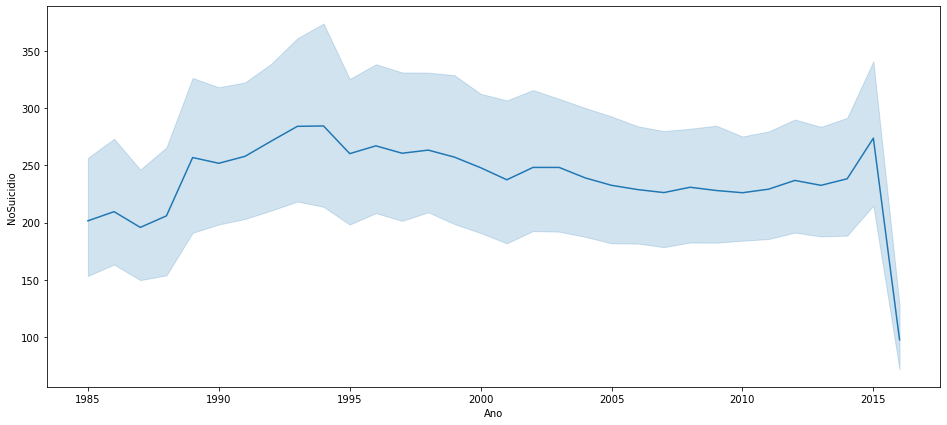

In [19]:
# Gráfico de Linha: Ano x Suicidio 
# Problema: gráfico apresenta margem de erro
plt.figure(figsize = (16,7))
sns.lineplot(x = 'Ano' , y = 'NoSuicidio', data = dataset) # Retornou valores incorretos

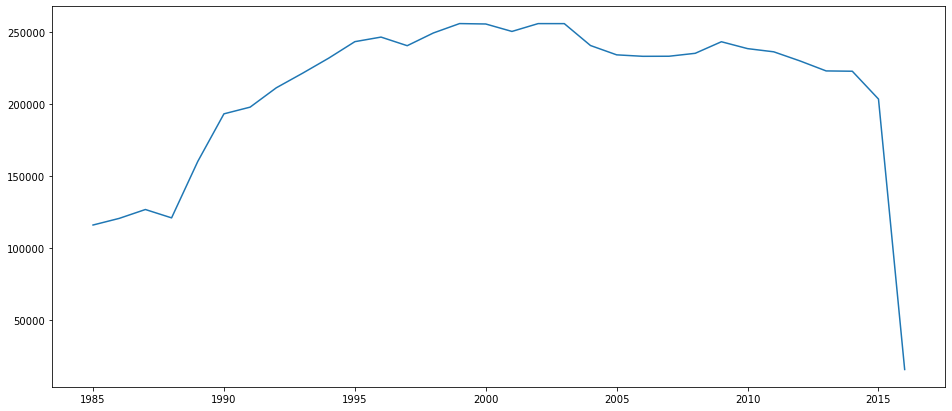

In [20]:
# Gráfico de Linha: Ano x Suicidio# Retornou valores incorretos
# Utilizei outro gráfico, pois os anos apresentam números de suicídio muito próximos
dataset_ano = dataset['NoSuicidio'].groupby(dataset['Ano']).sum()

dicionario_ano = dict(dataset_ano)

plt.figure(figsize = (16,7))
sns.lineplot(x = list(dicionario_ano.keys()), y = list(dicionario_ano.values()))

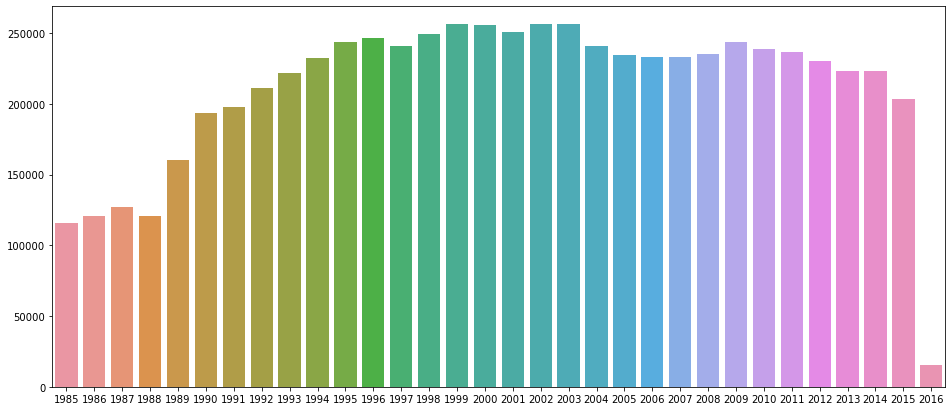

In [21]:
# Gráfico de Barras: Ano x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = list(dicionario_ano.keys()), y = list(dicionario_ano.values()))

### 2.2 Quantidade de suidicios por Sexo

In [22]:
# Soma da quantidade de suicidios por sexo
dataset.pivot_table(values='NoSuicidio', index=['Sexo'], aggfunc='sum', margins=True)

,NoSuicidio
Sexo,
female,1559510
male,5188910
All,6748420


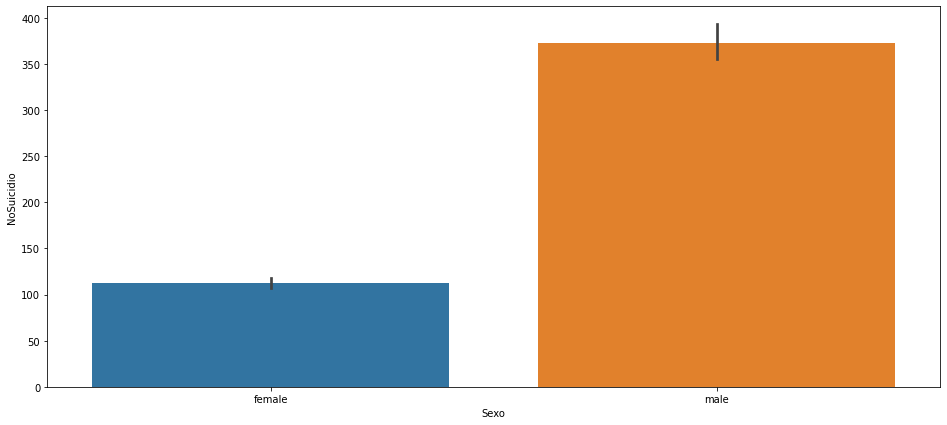

In [23]:
# Gráfico de Barras: Sexo x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = 'Sexo', y = 'NoSuicidio', data = dataset)

### 2.3 Quantidade de suidicios por Idade

In [24]:
# Soma da quantidade de suicidios por idade
dataset.pivot_table(values='NoSuicidio', index=['Idade'], aggfunc='sum', margins=True)

,NoSuicidio
Idade,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118
All,6748420


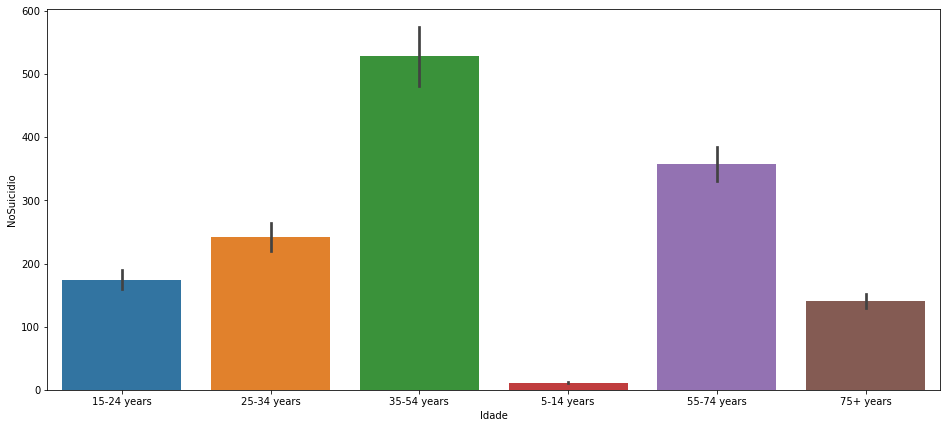

In [25]:
# Gráfico de Barras: Idade x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = 'Idade', y = 'NoSuicidio', data = dataset)

In [26]:
# Soma da quantidade de suicidios por idade e sexo
dataset.pivot_table(values='NoSuicidio', index=['Idade', 'Sexo'], aggfunc='sum', margins=True)

NoSuicidio
Idade       Sexo              
15-24 years female      175437
            male        633105
25-34 years female      208823
            male        915089
35-54 years female      506233
            male       1945908
5-14 years  female       16997
            male         35267
55-74 years female      430036
            male       1228407
75+ years   female      221984
            male        431134
All                    6748420

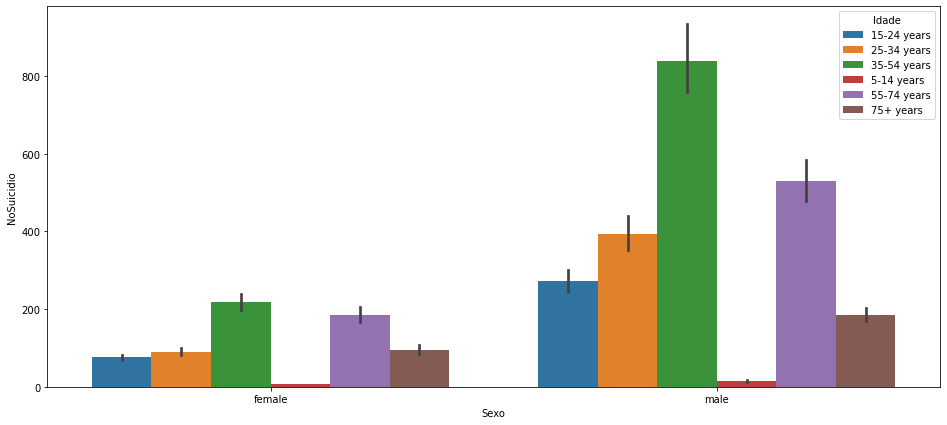

In [27]:
# Gráfico de Barras: Sexo x Suicidio x Idade (Geral)
plt.figure(figsize = (16,7))
sns.barplot(x = 'Sexo', y = 'NoSuicidio', hue = 'Idade', data = dataset)

### 2.4 Quantidade de suidicios por Geração

In [28]:
# Soma da quantidade de suicidios por Geração
dataset.pivot_table(values=['NoSuicidio'], index=['Geracao'], aggfunc='sum', margins=True)

,NoSuicidio
Geracao,
Boomers,2284498
G.I. Generation,510009
Generation X,1532804
Generation Z,15906
Millenials,623459
Silent,1781744
All,6748420


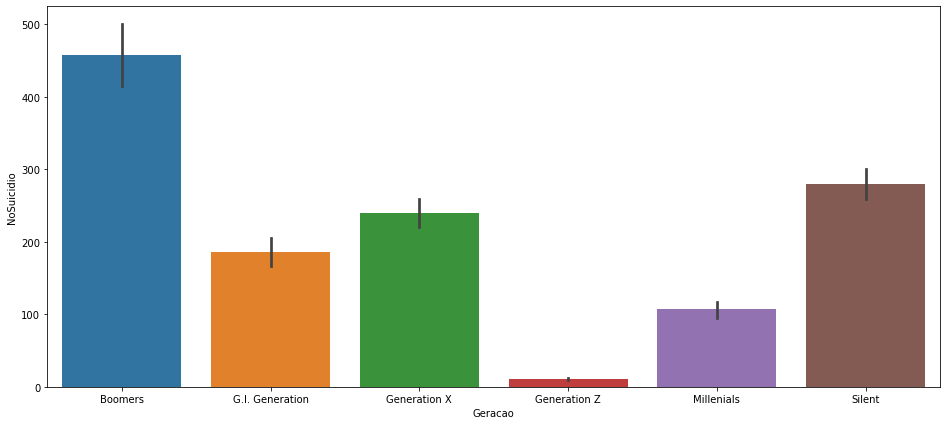

In [29]:
# Gráfico de Barras: Geração x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = 'Geracao', y = 'NoSuicidio', data = dataset)

### 2.5 Quantidade de suidicios por País

In [30]:
# Soma da quantidade de suicidios por Pais
dataset.pivot_table(values='NoSuicidio', index=['Pais'], aggfunc='sum', margins=True)

,NoSuicidio
Pais,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
...,...
United Kingdom,136805
United States,1034013
Uruguay,13138


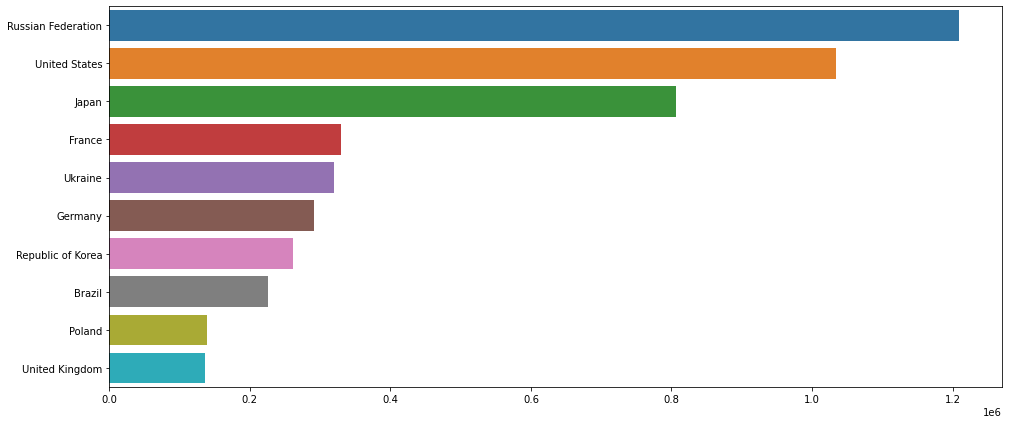

In [47]:
# Gráfico de Barras: 10 países com o maior número de suicidio
dataset_pais = dataset['NoSuicidio'].groupby(dataset['Pais']).sum()
dataset_pais = dataset_pais.sort_values(ascending = False).head(10)

dicionario_pais = dict(dataset_pais)

plt.figure(figsize = (16,7))
sns.barplot(x = list(dicionario_pais.values()), y = list(dicionario_pais.keys()))

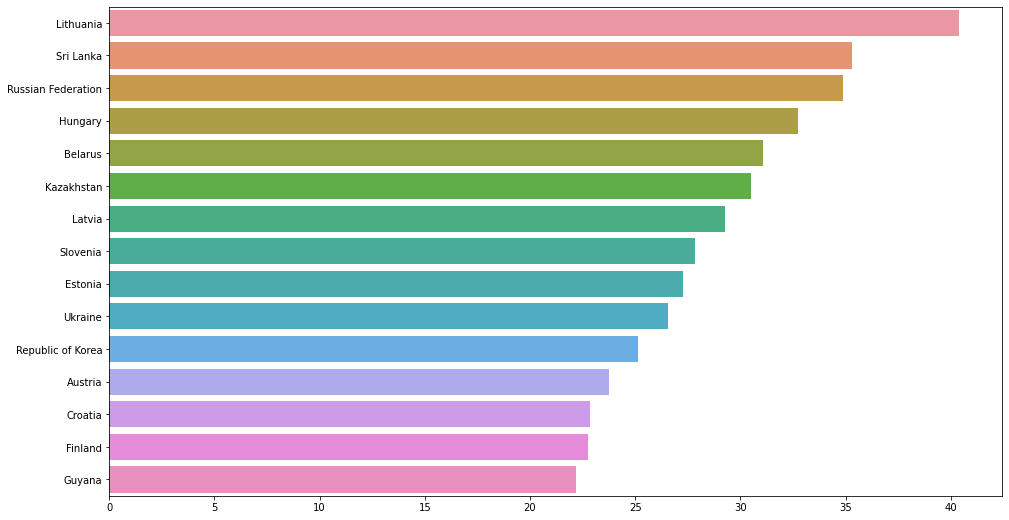

In [32]:
# Gráfico de Barras: 15 países com as maiores médias de taxas de suicidio por 100k habitantes
dataset_pais = dataset['Suicidio100kPop'].groupby(dataset['Pais']).mean()
dataset_pais = dataset_pais.sort_values(ascending = False).head(15)

dicionario_pais = dict(dataset_pais)

plt.figure(figsize = (16,9))
sns.barplot(x = list(dicionario_pais.values()), y = list(dicionario_pais.keys()))

# 3. Manipulação e visualização dos dados (País: Brasil)

In [33]:
# Dataset do Brasil
dataset_brasil = dataset[(dataset['Pais'] == 'Brazil')]
dataset_brasil

,Pais,Ano,Sexo,Idade,NoSuicidio,Populacao,Suicidio100kPop,PIBPorAnoValor,PIBPerCapitaValor,Geracao
4172,Brazil,1985,male,75+ years,129,840300,15.35,222942790435,1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,222942790435,1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,222942790435,1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,222942790435,1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,222942790435,1898,Generation X
...,...,...,...,...,...,...,...,...,...,...
4539,Brazil,2015,female,25-34 years,466,17546090,2.66,1802214373741,9431,Millenials
4540,Brazil,2015,female,75+ years,89,3802086,2.34,1802214373741,9431,Silent
4541,Brazil,2015,female,15-24 years,397,17047218,2.33,1802214373741,9431,Millenials
4542,Brazil,2015,male,5-14 years,79,16057040,0.49,1802214373741,9431,Generation Z


In [34]:
# Soma do número de suicídio no Brasil
dataset_brasil['NoSuicidio'].sum()

226613

### 3.1 Quantidade de suidicios por Ano

In [35]:
# Total de suicídio no Brasil por ano
dataset_brasil.pivot_table(values='NoSuicidio', index=['Ano'], aggfunc='sum', margins=True)

,NoSuicidio
Ano,
1985,4228
1986,4271
1987,4672
1988,4466
1989,4463
1990,4803
1991,5156
1992,5207
1993,5508


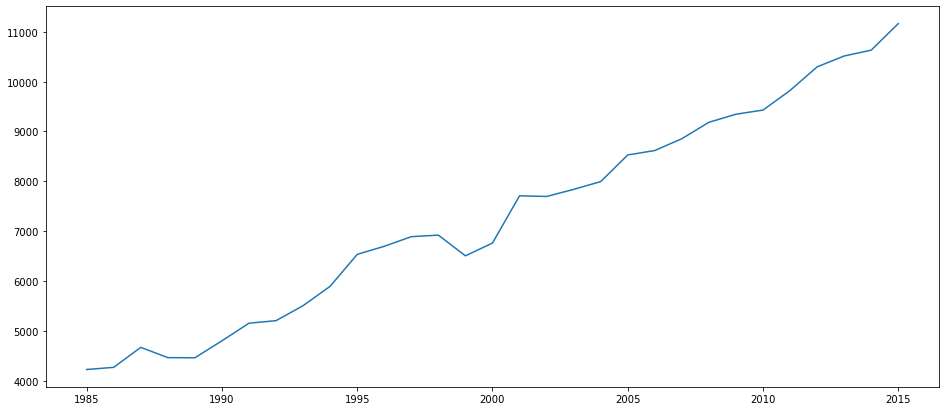

In [36]:
# Gráfico de linhas: Número de suicídios X Ano (Brasil)
dataset_ano_brasil = dataset_brasil['NoSuicidio'].groupby(dataset_brasil['Ano']).sum()

dicionario_ano_brasil = dict(dataset_ano_brasil)

plt.figure(figsize = (16,7))
sns.lineplot(x = list(dicionario_ano_brasil.keys()), y = list(dicionario_ano_brasil.values()))

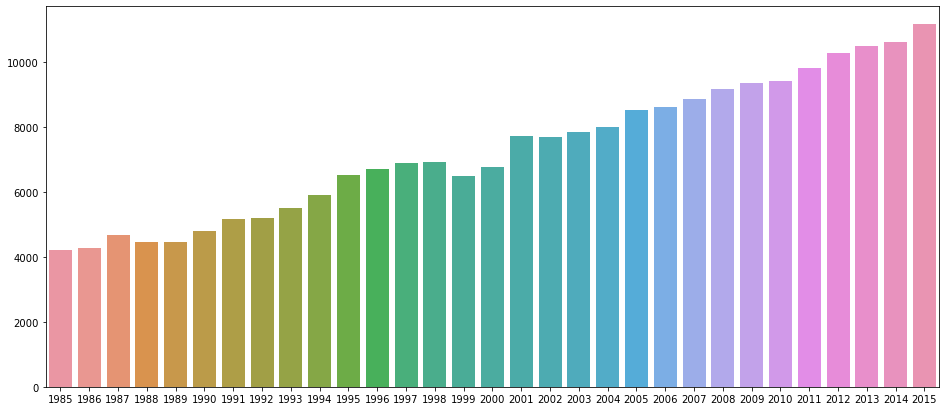

In [37]:
# Gráfico de Barras: Número de suicídios X Ano (Brasil)
plt.figure(figsize = (16,7))
sns.barplot(x = list(dicionario_ano_brasil.keys()), y = list(dicionario_ano_brasil.values()))

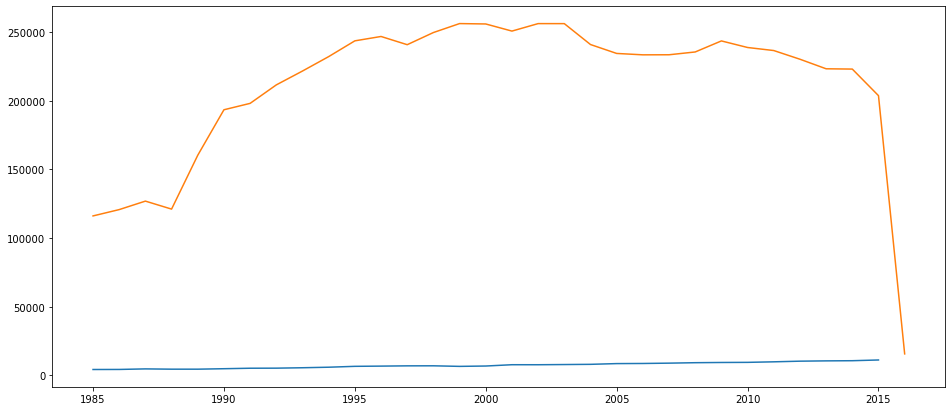

In [38]:
# Gráfico de linhas: Número de suicídios X Ano (Brasil x Geral)
plt.figure(figsize = (16,7))

sns.lineplot(x = list(dicionario_ano_brasil.keys()), y = list(dicionario_ano_brasil.values()))
sns.lineplot(x = list(dicionario_ano.keys()), y = list(dicionario_ano.values()))

### 3.2 Quantidade de suidicios por Sexo

In [39]:
# Soma da quantidade de suicidios por sexo
dataset_brasil.pivot_table(values='NoSuicidio', index=['Sexo'], aggfunc='sum', margins=True)

,NoSuicidio
Sexo,
female,49015
male,177598
All,226613


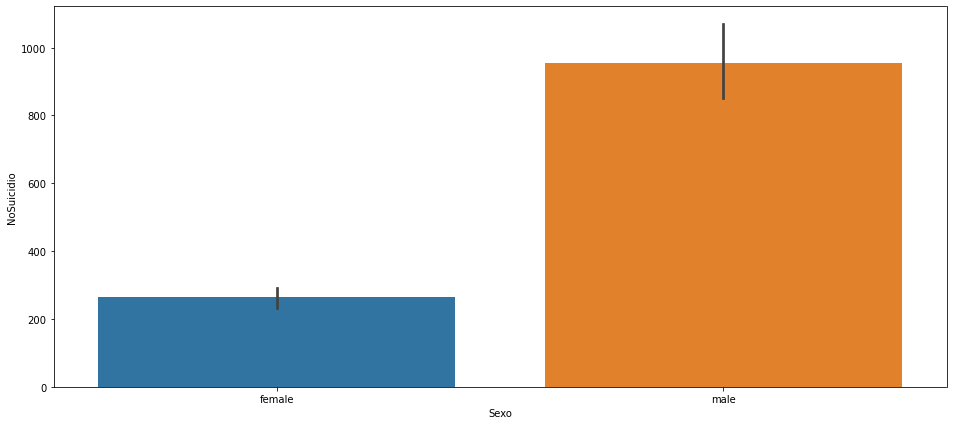

In [40]:
# Gráfico de Barras: Sexo x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = 'Sexo', y = 'NoSuicidio', data = dataset_brasil)

### 3.3 Quantidade de suidicios por Idade

In [41]:
# Soma da quantidade de suicidios no Brasil por idade
dataset_brasil.pivot_table(values='NoSuicidio', index=['Idade'], aggfunc='sum', margins=True)

,NoSuicidio
Idade,
15-24 years,44597
25-34 years,52534
35-54 years,79860
5-14 years,3029
55-74 years,37556
75+ years,9037
All,226613


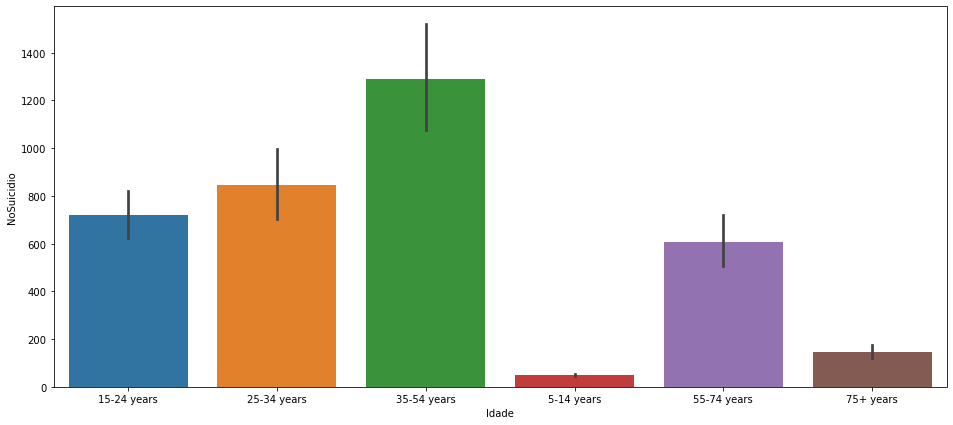

In [42]:
# Gráfico de Barras: Idade x Suicidio
plt.figure(figsize = (16,7))
sns.barplot(x = 'Idade', y = 'NoSuicidio', data = dataset_brasil)

In [43]:
# Soma da quantidade de suicidios por idade e sexo
dataset_brasil.pivot_table(values='NoSuicidio', index=['Idade', 'Sexo'], aggfunc='sum', margins=True)

NoSuicidio
Idade       Sexo              
15-24 years female       10877
            male         33720
25-34 years female       10065
            male         42469
35-54 years female       17360
            male         62500
5-14 years  female        1399
            male          1630
55-74 years female        7712
            male         29844
75+ years   female        1602
            male          7435
All                     226613

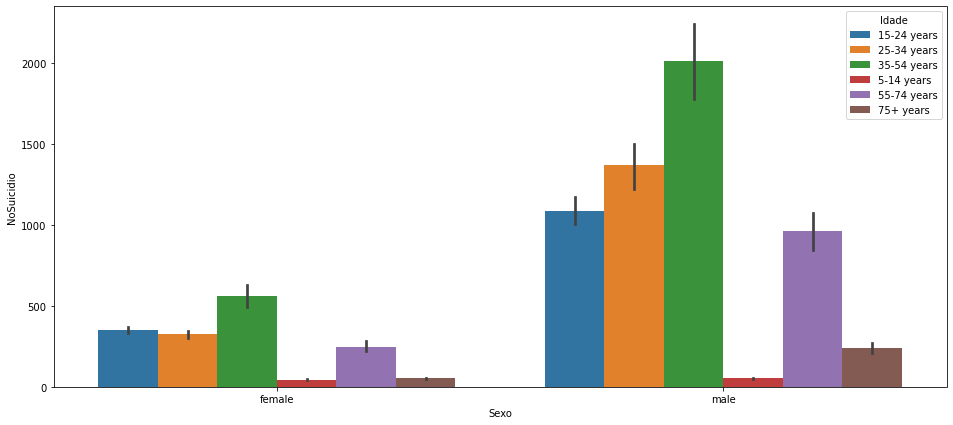

In [44]:
# Gráfico de Barras: Sexo x Suicidio x Idade (Brasil)
plt.figure(figsize = (16,7))
sns.barplot(x = 'Sexo', y = 'NoSuicidio', hue = 'Idade', data = dataset_brasil)